# PCA : Principal Component Analysis

It helps you to reduce the number of features in a dataset while keeping the most important information.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"c:/users/sakshi yadav/Downloads/Iris.csv")

In [6]:
df.shape

(150, 6)

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
new_df = df.drop(columns=['Id','Species'])

In [9]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Usage of PCA:
- Decrease Computational Cost
- Decrease Overfitting
- Make Visulization Easy
- Reduce Number of Feature

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2)

In [12]:
df_pca = pca.fit_transform(new_df)

In [13]:
df_pca[:5]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [14]:
df['pca1'] = df_pca[:,0]

In [15]:
df['pca2'] = df_pca[:,1]

In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pca1,pca2
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


In [17]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'pca1', 'pca2'],
      dtype='object')

In [18]:
col = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [19]:
df = df.drop(columns=col)

In [20]:
df.head()

,Species,pca1,pca2
0,Iris-setosa,-2.684207,0.326607
1,Iris-setosa,-2.715391,-0.169557
2,Iris-setosa,-2.889820,-0.137346
3,Iris-setosa,-2.746437,-0.311124
4,Iris-setosa,-2.728593,0.333925


# Limitations
- Use for unsupervised learning for better result
- PCA is best for linear relationship
- Harder with transformed data

In [21]:
df.select_dtypes(include=np.number).columns

Index(['pca1', 'pca2'], dtype='object')

In [22]:
from sklearn.cluster import KMeans

In [23]:
print("We have",len(df.Species.unique()),"Unique Values")

We have 3 Unique Values


In [24]:
kmeans = KMeans(n_clusters=3)

In [25]:
data = kmeans.fit_predict(df.select_dtypes(include=np.number))

In [26]:
data

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [27]:
df['new_species'] = data

In [28]:
df.head()

,Species,pca1,pca2,new_species
0,Iris-setosa,-2.684207,0.326607,2
1,Iris-setosa,-2.715391,-0.169557,2
2,Iris-setosa,-2.889820,-0.137346,2
3,Iris-setosa,-2.746437,-0.311124,2
4,Iris-setosa,-2.728593,0.333925,2


In [29]:
df

,Species,pca1,pca2,new_species
0,Iris-setosa,-2.684207,0.326607,2
1,Iris-setosa,-2.715391,-0.169557,2
2,Iris-setosa,-2.889820,-0.137346,2
3,Iris-setosa,-2.746437,-0.311124,2
4,Iris-setosa,-2.728593,0.333925,2
...,...,...,...,...
145,Iris-virginica,1.944017,0.187415,1
146,Iris-virginica,1.525664,-0.375021,0
147,Iris-virginica,1.764046,0.078519,1
148,Iris-virginica,1.901629,0.115877,1


In [30]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
def encode(val):
    dic = {'Iris-setosa':0, 'Iris-versicolor':2, 'Iris-virginica':1}
    return dic[val]

In [32]:
df['encoded_species'] = df.Species.map(encode)

In [33]:
df.head()

,Species,pca1,pca2,new_species,encoded_species
0,Iris-setosa,-2.684207,0.326607,2,0
1,Iris-setosa,-2.715391,-0.169557,2,0
2,Iris-setosa,-2.889820,-0.137346,2,0
3,Iris-setosa,-2.746437,-0.311124,2,0
4,Iris-setosa,-2.728593,0.333925,2,0


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
print("Accuracy Score:",round(accuracy_score(df.new_species,df.encoded_species)*100),'%')

Accuracy Score: 24 %


In [36]:
cm = confusion_matrix(df.new_species,df.encoded_species)

In [37]:
cm

array([[ 0, 14, 47],
       [ 0, 36,  3],
       [50,  0,  0]])

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

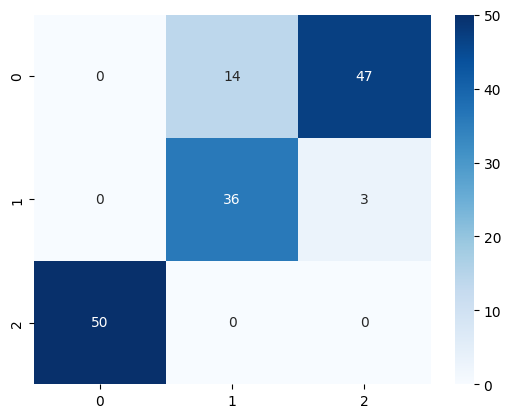

In [42]:
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()